<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Amir Hosein Rahmati<br>
   **Student ID**: 99103922 <br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

# importing libraries  

In [100]:
import numpy as np
import pandas as pn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


# data
the data is about some houses in USA , there are some features about houses in the area that the house is.and also there is the price of house .
<br>

 features : [ AVG Area Income , AVG Area House Age , AVG Area number of rooms , AVG Area Number of Bedrooms , Area Population]
 </br>
 <br>
<b>the goal is to find a linear regression between features and the price. </b>
</br>
<br>
data link : https://www.kaggle.com/datasets/dmvreddy91/usahousing?resource=download

In [89]:
data = pn.read_csv("./USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


we will first normalize the features values

In [82]:
#min-max rescaling 
data = data.drop("Address",axis = 1)
for fe in data.columns :
    data[fe] = (data[fe] - min(data[fe])) / (max(data[fe]) - min(data[fe]))

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


it's time to separate the train , validation and the test samples.

In [83]:
data_y = data["Price"]
data_x = data.drop("Price",axis=1)
x_train, x_test, y_train, y_test = train_test_split(data_x , data_y , test_size=0.20, random_state=42)
x_train,x_valid, y_train, y_valid = train_test_split(x_train , y_train, test_size = 0.20,random_state=42)

# reshaping data
x_train = np.append(np.ones((x_train.shape[0], 1)), x_train , axis=1)
x_valid = np.append(np.ones((x_valid.shape[0], 1)), x_valid , axis=1)
x_test = np.append(np.ones((x_test.shape[0], 1)), x_test , axis=1)

y_train = np.array(y_train).reshape(y_train.shape[0],1)
y_valid = np.array(y_valid).reshape(y_valid.shape[0],1)
y_test = np.array(y_test).reshape(y_test.shape[0],1)



# linear Regression  
$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$
if $\hat{y}$ be our linear function the loss function will be define as L(w):

$$ L(w) = \frac{1}{N} \lVert Xw - y \rVert ^2$$





# gradient decent 
<br>we want to minimize the loss function by optimizing coefficient vector $w$, using gradient decent approach . <br>
$$
w_{n + 1} := w_n - \alpha \frac{\partial L(w_n)}{\partial w}
$$
$ \alpha $ is the learning rate(lr) , and the gradient of loss function in respect to $ w $ will be :
$$
\frac{\partial L(w)}{\partial w} = \frac{2}{N}X^T(Xw - y)
$$
the gradient decent approach will be executed $ iter $ times.

In [84]:
def error_calculator(y,predicted_y):
    # print(predicted_y.shape , y.shape)
    return predicted_y - y

def mse(error,sample_size):
    return ((np.linalg.norm(error))**2) / sample_size 

def predict(X, W):
    return np.dot(X, W)

def generate_random_coefficients(coefficients_number):
    return np.random.rand(coefficients_number,1)

def calc_gradient(X, error):
    gradient = np.dot(X.T, error)
    return gradient

def update_weights(W, lr, gradient):
    new_weights = W - lr * gradient
    return new_weights

def train_model_lr_gd(X, Y, W , iter, lr):
    losses = []
    for i in range(iter):
        # generating the predictions 
        predicted_y = predict(X, W)
        #calculating the error
        error = error_calculator(Y , predicted_y)
        # calculating the loss
        loss = mse(error,Y.shape[0])
        # adding the loss to our loss list 
        losses.append(loss)
        # calculating gradients
        gradient = (calc_gradient(X, error)  / (Y.size))
        # updating weights and biases
        W = update_weights(W, lr, gradient)
    return W, losses

# train and validation
we will train the model with different hyperparameter $ iter $ and $ \alpha (lr)$ , then we will choose the best hyperparameter using the validation data.
 

In [86]:

alpha_set = np.random.rand(10,1).tolist()
iter_set = [500 , 5000 , 10000]
initial_w = generate_random_coefficients(x_train.shape[1])

best_W = generate_random_coefficients(x_train.shape[1])
best_losses =[]
best_validation_lost = float("inf")
best_iter = 0
best_alpha = 0
# print(x_train.shape, initial_w.shape , y_train.shape)
for iter in iter_set:
    for alpha in alpha_set:
        # train
        W , losses = train_model_lr_gd(x_train,y_train,initial_w,iter,alpha)
        # validation 
        predicted = predict(x_valid,W)
        error = error_calculator(y_valid,predicted)
        validation_loss = mse(error,y_valid.shape[0])

        if (validation_loss < best_validation_lost):
            best_W = W
            best_losses = losses
            best_validation_lost = validation_loss
            best_iter = iter
            best_alpha = alpha

print(f"best mse on the train data for the chosen model is = {best_losses[-1]}")
print(f"and best mse on the validation data for the chosen model is = {best_validation_lost}")
print(f"the hyperparameter : iter ={best_iter} , lr ={best_alpha}")

/tmp/ipykernel_3828/1824035401.py:19: RuntimeWarning: invalid value encountered in subtract
  new_weights = W - lr * gradient


best mse on the train data for the chosen model is = 0.0017079164520838064
and best mse on the validation data for the chosen model is = 0.0016939979915936022
the hyperparameter : iter =5000 , lr =[0.5011003326315726]


# plot 
u can see the the loss changes by any iteration in plot below 

Text(0, 0.5, 'loss')

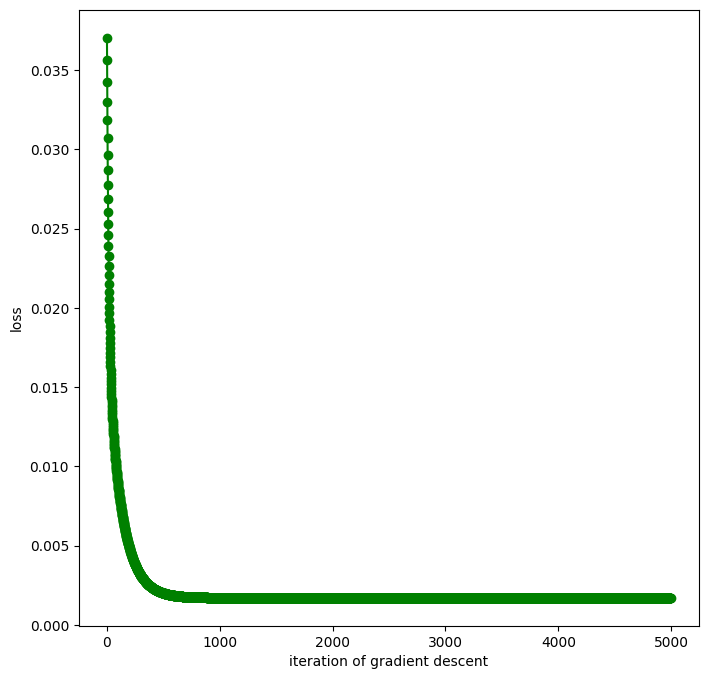

In [111]:
best_losses.remove(max(best_losses))
fig, axs = plt.subplots(1,1,figsize=(8, 8))
axs.plot(np.arange(0, len(best_losses)), best_losses, 'og-')
axs.set_xlabel('iteration of gradient descent')
axs.set_ylabel('loss')


# test
the mse of trained model on the test samples will be calculated in the next part

In [95]:
predicted = predict(x_test,best_W)
error = error_calculator(y_test,predicted)
test_loss = mse(error,y_test.shape[0])

print(f"the mse of test samples by the trained model will be = {test_loss}")

the mse of test samples by the trained model will be = 0.001680065317324872


# Lasso Regression
$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$
if $\hat{y}$ be our linear function the loss function will be define as L(w):

$$ L(w) = \frac{1}{N} ( \lVert Xw - y \rVert_2 ^2  + \lambda \lVert w \rVert_1  )$$

the gradient of new loss function in respect to $ w $ will be :
$$
\frac{\partial L(w)}{\partial w} = \frac{1}{N}(X^T(Xw - y) + \lambda sign(w))
$$
the sign function on vector w returns a vector with 1 and -1 values ,for any positive element we will have 1 and for any negative element we will have -1


In [120]:
def lasso_calc_gradient(X, error, w , la):
    gradient = np.dot(X.T, error) + (la * np.sign(w))
    return gradient
def train_lasso_model_lr_gd(X, Y, W , iter, lr , la ):
    losses = []
    for i in range(iter):
        # generating the predictions 
        predicted_y = predict(X, W)
        #calculating the error
        error = error_calculator(Y , predicted_y)
        # calculating the loss
        loss = mse(error,Y.shape[0])
        # adding the loss to our loss list 
        losses.append(loss)
        # calculating gradients
        gradient = (lasso_calc_gradient(X, error,W,la)  / (Y.size))
        # updating weights and biases
        W = update_weights(W, lr, gradient)
    return W, losses

# train and validation lasso regression
we will train the model with different hyperparameter $ iter $ , $ \alpha (lr)$ ,and $ \lambda $, then we will choose the best hyperparameter using the validation data.

In [125]:
lambda_set = alpha_set = np.random.rand(5,1).tolist()
alpha_set = np.random.rand(5,1).tolist()
iter_set = [500 , 5000 , 10000]
initial_w = generate_random_coefficients(x_train.shape[1])

best_W = generate_random_coefficients(x_train.shape[1])
best_losses =[]
best_validation_lost = float("inf")
best_iter = 0
best_alpha = 0
best_lambda = 0
# print(x_train.shape, initial_w.shape , y_train.shape)
for iter in iter_set:
    for alpha in alpha_set:
        for la in lambda_set:
            # train
            W , losses = train_lasso_model_lr_gd(x_train,y_train,initial_w,iter,alpha,la)
            # validation 
            predicted = predict(x_valid,W)
            error = error_calculator(y_valid,predicted)
            validation_loss = mse(error,y_valid.shape[0])

            if (validation_loss < best_validation_lost):
                best_W = W
                best_losses = losses
                best_validation_lost = validation_loss
                best_iter = iter
                best_alpha = alpha
                best_lambda = la

print(f"best mse on the train data for the chosen model is = {best_losses[-1]}")
print(f"and best mse on the validation data for the chosen model is = {best_validation_lost}")
print(f"the hyperparameter : iter ={best_iter} , lr ={best_alpha} , lambda ={best_lambda}")

/tmp/ipykernel_3828/1824035401.py:19: RuntimeWarning: invalid value encountered in subtract
  new_weights = W - lr * gradient


best mse on the train data for the chosen model is = 0.001708291239630039
and best mse on the validation data for the chosen model is = 0.0016927621009720315
the hyperparameter : iter =5000 , lr =[0.10998584019624402] , lambda =[0.010156509615643627]


# test
the mse of trained lasso regression model on the test samples will be calculated in the next part

In [130]:
predicted = predict(x_test,best_W)
error = error_calculator(y_test,predicted)
test_loss = mse(error,y_test.shape[0])

print(f"the mse of test samples by the trained model will be = {test_loss}")

the mse of test samples by the trained model will be = 0.0016801781875158516


# Ridge Regression
$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$
if $\hat{y}$ be our linear function the loss function will be defined as L(w):

$$ L(w) = \frac{1}{N} ( \lVert Xw - y \rVert_2 ^2  + \lambda \lVert w \rVert^2  )$$

the gradient of new loss function in respect to $ w $ will be :
$$
\frac{\partial L(w)}{\partial w} = \frac{1}{N}(X^T(Xw - y) + \lambda w)
$$

In [129]:
def ridge_calc_gradient(X, error, w , la):
    gradient = np.dot(X.T, error) + la * w
    return gradient
def train_ridge_model_lr_gd(X, Y, W , iter, lr , la ):
    losses = []
    for i in range(iter):
        # generating the predictions 
        predicted_y = predict(X, W)
        #calculating the error
        error = error_calculator(Y , predicted_y)
        # calculating the loss
        loss = mse(error,Y.shape[0])
        # adding the loss to our loss list 
        losses.append(loss)
        # calculating gradients
        gradient = (ridge_calc_gradient(X, error,W,la)  / (Y.size))
        # updating weights and biases
        W = update_weights(W, lr, gradient)
    return W, losses

# train and validation Ridge regression
we will train the model with different hyperparameter $ iter $ , $ \alpha (lr)$ ,and $ \lambda $, then we will choose the best hyperparameter using the validation data.

In [131]:
lambda_set = alpha_set = np.random.rand(5,1).tolist()
alpha_set = np.random.rand(5,1).tolist()
iter_set = [500 , 5000 , 10000]
initial_w = generate_random_coefficients(x_train.shape[1])

best_W = generate_random_coefficients(x_train.shape[1])
best_losses =[]
best_validation_lost = float("inf")
best_iter = 0
best_alpha = 0
best_lambda = 0
# print(x_train.shape, initial_w.shape , y_train.shape)
for iter in iter_set:
    for alpha in alpha_set:
        for la in lambda_set:
            # train
            W , losses = train_ridge_model_lr_gd(x_train,y_train,initial_w,iter,alpha,la)
            # validation 
            predicted = predict(x_valid,W)
            error = error_calculator(y_valid,predicted)
            validation_loss = mse(error,y_valid.shape[0])

            if (validation_loss < best_validation_lost):
                best_W = W
                best_losses = losses
                best_validation_lost = validation_loss
                best_iter = iter
                best_alpha = alpha
                best_lambda = la

print(f"best mse on the train data for the chosen model is = {best_losses[-1]}")
print(f"and best mse on the validation data for the chosen model is = {best_validation_lost}")
print(f"the hyperparameter : iter ={best_iter} , lr ={best_alpha} , lambda ={best_lambda}")

/tmp/ipykernel_3828/1824035401.py:19: RuntimeWarning: invalid value encountered in subtract
  new_weights = W - lr * gradient


best mse on the train data for the chosen model is = 0.0017088445830709088
and best mse on the validation data for the chosen model is = 0.001691916093729806
the hyperparameter : iter =5000 , lr =[0.14676310427096562] , lambda =[0.20269216996824502]


# test
the mse of trained ridge regression model on the test samples will be calculated in the next part

In [132]:
predicted = predict(x_test,best_W)
error = error_calculator(y_test,predicted)
test_loss = mse(error,y_test.shape[0])

print(f"the mse of test samples by the trained model will be = {test_loss}")

the mse of test samples by the trained model will be = 0.0016799840411246493


# Elastic Net Regression
$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$
if $\hat{y}$ be our linear function the loss function will be defined as L(w):

$$ L(w) = \frac{1}{N} ( \lVert Xw - y \rVert_2 ^2  + \lambda \lVert w \rVert^2 + \beta \lVert w \rVert_1  )$$

the gradient of new loss function in respect to $ w $ will be :
$$
\frac{\partial L(w)}{\partial w} = \frac{1}{N}(X^T(Xw - y) + \lambda w + \beta sign(w))
$$

In [134]:
def Elastic_net_calc_gradient(X, error, w , la , be):
    gradient = np.dot(X.T, error) + (be * np.sign(w)) + (la * w)
    return gradient
def train_lasso_model_lr_gd(X, Y, W , iter, lr , la , be  ):
    losses = []
    for i in range(iter):
        # generating the predictions 
        predicted_y = predict(X, W)
        #calculating the error
        error = error_calculator(Y , predicted_y)
        # calculating the loss
        loss = mse(error,Y.shape[0])
        # adding the loss to our loss list 
        losses.append(loss)
        # calculating gradients
        gradient = (Elastic_net_calc_gradient(X, error,W,la,be)  / (Y.size))
        # updating weights and biases
        W = update_weights(W, lr, gradient)
    return W, losses

# train and validation Elastic Net  regression
we will train the model with different hyperparameter $ iter $ , $ \alpha (lr)$ , $ \lambda $,and $ \beta\ $ then we will choose the best hyperparameter using the validation data.

In [135]:
lambda_set = alpha_set = np.random.rand(5,1).tolist()
Beta_set = alpha_set = np.random.rand(5,1).tolist()
alpha_set = np.random.rand(5,1).tolist()
iter_set = [500 , 5000]
initial_w = generate_random_coefficients(x_train.shape[1])

best_W = generate_random_coefficients(x_train.shape[1])
best_losses =[]
best_validation_lost = float("inf")
best_iter = 0
best_alpha = 0
best_lambda = 0
best_beta = 0
# print(x_train.shape, initial_w.shape , y_train.shape)
for iter in iter_set:
    for alpha in alpha_set:
        for la in lambda_set:
            for be in Beta_set:
                # train
                W , losses = train_ridge_model_lr_gd(x_train,y_train,initial_w,iter,alpha,la)
                # validation 
                predicted = predict(x_valid,W)
                error = error_calculator(y_valid,predicted)
                validation_loss = mse(error,y_valid.shape[0])

                if (validation_loss < best_validation_lost):
                    best_W = W
                    best_losses = losses
                    best_validation_lost = validation_loss
                    best_iter = iter
                    best_alpha = alpha
                    best_lambda = la
                    best_beta = be 

print(f"best mse on the train data for the chosen model is = {best_losses[-1]}")
print(f"and best mse on the validation data for the chosen model is = {best_validation_lost}")
print(f"the hyperparameter : iter ={best_iter} , lr ={best_alpha} , lambda ={best_lambda} , beta = {best_beta}")

/tmp/ipykernel_3828/1824035401.py:19: RuntimeWarning: invalid value encountered in subtract
  new_weights = W - lr * gradient


best mse on the train data for the chosen model is = 0.00171581906704635
and best mse on the validation data for the chosen model is = 0.001693019762716589
the hyperparameter : iter =5000 , lr =[0.5572886194675679] , lambda =[0.6974451233844517] , beta = [0.2888428685666008]


# test 
the mse of trained ridge regression model on the test samples will be calculated in the next part

In [137]:
predicted = predict(x_test,best_W)
error = error_calculator(y_test,predicted)
test_loss = mse(error,y_test.shape[0])

print(f"the mse of test samples by the trained model will be = {test_loss}")

the mse of test samples by the trained model will be = 0.0016847668408565973


# conclusion
<br> <b> simple regression without regularization term : </b> </br>
there is a good linear regression for this data set and as it is showed the mse for the test samples are less than 0.01 
<br></br>
<br><b> lasso regression: </b> <br>
using lasso regression will affect the weights as it wont allow them to get so large.
in our model, after validation , our hyperparameter for lasso term has been chosen 0.01 . which is a small number and decreases the effect of regularization term, and our model will be so similar to the regression without regularization term.
<br></br>
<br><b> Ridge regression: </b> <br>
using ridge regression will affect the weights as it wont allow them get so large and wont allow them to have a big standard deviation. we can see the effect of ridge regularization term , the mse on the test samples has been decreased a bit.
<br></br>

<br><b> Elastic Net regression: </b> <br>
we can use both lasso and ridge regularization terms in Elastic Net regression models. as it is showed after validation the hyperparameter of both terms hadn't chosen too large or too small. although there is a small increase in mse of test samples , it is expected that the trained Elastic Net model be a proper model to predict other samples target by their features value.
